In [1]:
import numpy as np
from scipy import stats
from sklearn.metrics import f1_score
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
import matplotlib.pyplot as plt

/anaconda3/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
X_orig = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
Y_True = np.array([0,    0,    0,    0,    0,    0,    1,    0,    1,    0,    1,    0,    1,    0,    1,    1,    1,    1,    1,    1])

In [3]:
# split on
X_orig = X_orig[2:19]
Y_True = Y_True[2:19]

In [4]:
# y = mx + b, b is constant here
X = sm.add_constant(X_orig)

In [5]:
model = Logit(Y_True, X).fit_regularized(disp=False)

In [6]:
y_pred = model.predict(X)
y_out = y_pred

In [7]:
# y_pred[y_pred > 0.5] = 1
# y_pred[y_pred <= 0.5] = 0

In [8]:
y_pred

array([0.08435069, 0.11582111, 0.15701937, 0.20940147, 0.20940147,
       0.27358697, 0.34876746, 0.43231221, 0.51989305, 0.60626809,
       0.68647482, 0.75689437, 0.86292544, 0.89951444, 0.92716122,
       0.94764422, 0.96259954])

In [9]:
# f1_score(Y_True, y_pred)

In [10]:
cov = model.cov_params()

In [11]:
gradient = (y_out * (1 - y_out) * X.T).T

In [12]:
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])

  	Z
80% 	1.282
85% 	1.440
90% 	1.645
95% 	1.960
99% 	2.576
99.5% 	2.807
99.9% 	3.291

In [13]:
c = 1.282 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, y_out + std_errors * c))
lower = np.maximum(0, np.minimum(1, y_out - std_errors * c))

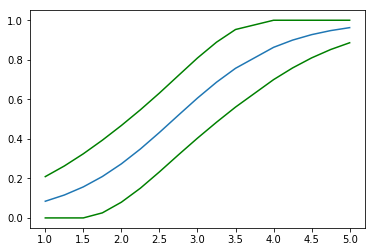

In [14]:
plt.plot(X_orig, y_out)
plt.plot(X_orig, lower, color='g')
plt.plot(X_orig, upper, color='g')
plt.show()

In [15]:
preds = []
N = 1000
for i in range(N):
    idx = np.random.choice(range(len(y_out)), size=len(y_out))
    try:
        model = sm.Logit(Y_True[idx], X[idx]).fit_regularized(disp=False)
        pred = model.predict(X)
        cov = model.cov_params()
        gradient = (pred * (1 - pred) * X.T).T
        std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])
        c = 1.282 # multiplier for confidence interval
        upper = np.maximum(0, np.minimum(1, pred + std_errors * c))
        lower = np.maximum(0, np.minimum(1, pred - std_errors * c))
        preds.append([lower, pred, upper])
    except:
        pass

/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in minimum
  if sys.path[0] == '':
/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in maximum
  if sys.path[0] == '':
/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in minimum
  del sys.path[0]
/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in maximum
  del sys.path[0]


In [16]:
np.random.choice(range(len(y_out)), size=100000)

array([10, 11,  9, ..., 15,  3, 16])

In [17]:
p = np.array(preds)
p = np.nan_to_num(p)

In [18]:
np.mean(p[:,0,:], 0)

array([0.00312527, 0.00948782, 0.0233337 , 0.05187617, 0.05187617,
       0.09825022, 0.16455735, 0.23733383, 0.32563982, 0.40975074,
       0.49930154, 0.57822447, 0.71772088, 0.76842735, 0.81116566,
       0.84529989, 0.87310198])

In [19]:
p[:,0,:]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.90494406e-01, 9.22167827e-01, 9.45306079e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.31403744e-01, 8.75765276e-01, 9.09703556e-01],
       [0.00000000e+00, 4.12123856e-02, 9.35151614e-02, ...,
        5.32616131e-01, 5.66495188e-01, 6.01596089e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.38619737e-01, 9.59137380e-01, 9.73030329e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.99213919e-01, 9.99788525e-01, 9.99943869e-01],
       [0.00000000e+00, 1.79960458e-04, 4.01227285e-02, ...,
        6.58864910e-01, 6.99786410e-01, 7.38511409e-01]])

## Bootstrap

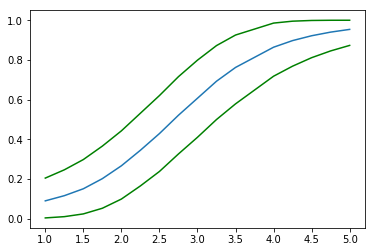

In [20]:
plt.plot(X_orig, np.mean(p[:,1,:], 0))
plt.plot(X_orig, np.mean(p[:,0,:], 0), 'g')
plt.plot(X_orig, np.mean(p[:,2,:], 0), 'g')
plt.show()

## Original

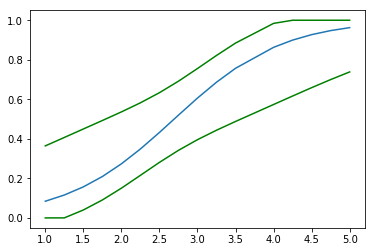

In [21]:
plt.plot(X_orig, y_out)
plt.plot(X_orig, lower, color='g')
plt.plot(X_orig, upper, color='g')
plt.show()